In [6]:
import pandas as pd

from genetic_program import FitnessFunction
from gp_artemis import ExperimentManager
from IPython.core.display import HTML, Javascript
from chart_plotter import DogeDNACanvas

%matplotlib inline
pd.set_option('display.max_columns', 500)

class WowFitnessFunction(FitnessFunction):
    _name = "ff_sowow"

    def compute(self, individual, evaluation, genetic_program):
        return evaluation.profit_percent * evaluation.num_sells,

class BenchmarkDiffFitnessFunction(FitnessFunction):
    _name = "ff_benchmarkdiff"

    def compute(self, individual, evaluation, genetic_program):
        return evaluation.profit_percent - evaluation.benchmark_backtest.profit_percent,

class BenchmarkDiff2FitnessFunction(FitnessFunction):
    _name = "ff_benchmarkdiff2"

    def compute(self, individual, evaluation, genetic_program):
        return (evaluation.profit_percent - evaluation.benchmark_backtest.profit_percent)*evaluation.num_profitable_trades,
    
    
experiment_json = {
    "training_data": [
        {
        "transaction_currency": "OMG",
        "counter_currency": "BTC",
        "start_time": "2018/04/01 00:00:00 UTC",
        "end_time": "2018/06/01 00:00:00 UTC",
        "resample_period": 60,
        "source": 0
        },
        {
        "transaction_currency": "DOGE",
        "counter_currency": "BTC",
        "start_time": "2018/04/01 00:00:00 UTC",
        "end_time": "2018/06/01 00:00:00 UTC",
        "resample_period": 60,
        "source": 0
        },
        {
        "transaction_currency": "ETH",
        "counter_currency": "BTC",
        "start_time": "2018/04/01 00:00:00 UTC",
        "end_time": "2018/06/01 00:00:00 UTC",
        "resample_period": 60,
        "source": 0
        }
    ],

    "validation_data": [{
        "transaction_currency": "OMG",
        "counter_currency": "BTC",
        "start_time": "2018/03/01 00:00:00 UTC",
        "end_time": "2018/03/31 00:00:00 UTC",
        "resample_period": 60,
        "source": 0
    }],

    "fitness_function": "ff_benchmarkdiff",
    "grammar_version": "gv1",
    "num_generations": 3,

    "mating_probabilities": [
        0.9
    ],

    "mutation_probabilities": [
        0.5
    ],

    "population_sizes": [
        500
    ]
}

e = ExperimentManager(experiment_json, read_from_file=False)
e.run_experiments(display_results=False)


INFO:root:>>> Variant run_evolution.data_OMG-BTC-1522540800.0-1527811200.0-DOGE-BTC-1522540800.0-1527811200.0;grammar_gv1;fitness_ff_benchmarkdiff;matingprob_0.9;mutationprob_0.5;populationsize_50;generations_3 already has completed records, skipping...
INFO:root:>>> Variant run_evolution.data_OMG-BTC-1522540800.0-1527811200.0-DOGE-BTC-1522540800.0-1527811200.0-ETH-BTC-1522540800.0-1527811200.0;grammar_gv1;fitness_ff_benchmarkdiff;matingprob_0.9;mutationprob_0.5;populationsize_50;generations_3 already has completed records, skipping...
INFO:root:Running variant 2
INFO:artemis:========== Running Experiment: run_evolution.data_OMG-BTC-1522540800.0-1527811200.0-DOGE-BTC-1522540800.0-1527811200.0-ETH-BTC-1522540800.0-1527811200.0;grammar_gv1;fitness_ff_benchmarkdiff;matingprob_0.9;mutationprob_0.5;populationsize_500;generations_3 ==========


   	      	                    fitness                    	              size             
   	      	-----------------------------------------------	-------------------------------
gen	nevals	avg     	max	min     	std    	avg  	max	min	std    
0  	500   	-28.3801	0  	-51.3669	19.2175	37.61	175	4  	48.0093
1  	480   	-16.5994	0  	-48.2267	20.0238	36.2 	168	4  	44.0483
2  	477   	-7.06679	0  	-46.9071	15.3035	37.762	162	4  	44.2067


INFO:artemis:Saving Result for Experiment "2018.09.05T11.41.45.936901-run_evolution.data_OMG-BTC-1522540800.0-1527811200.0-DOGE-BTC-1522540800.0-1527811200.0-ETH-BTC-1522540800.0-1527811200.0;grammar_gv1;fitness_ff_benchmarkdiff;matingprob_0.9;mutationprob_0.5;populationsize_500;generations_3"


3  	474   	-4.3162 	0  	-48.1847	12.6503	39.374	158	4  	41.611 


INFO:artemis:========== Done Running Experiment: run_evolution.data_OMG-BTC-1522540800.0-1527811200.0-DOGE-BTC-1522540800.0-1527811200.0-ETH-BTC-1522540800.0-1527811200.0;grammar_gv1;fitness_ff_benchmarkdiff;matingprob_0.9;mutationprob_0.5;populationsize_500;generations_3 ==========


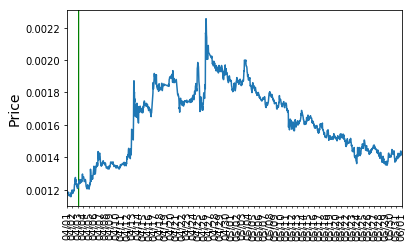

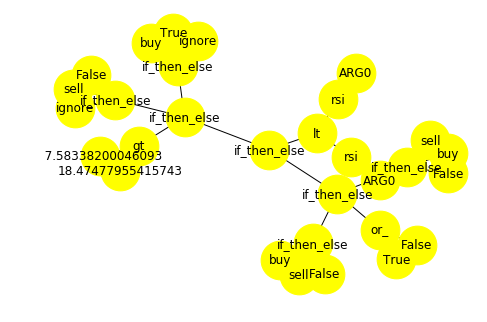

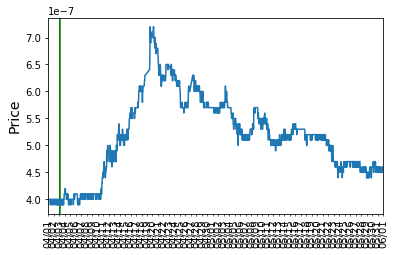

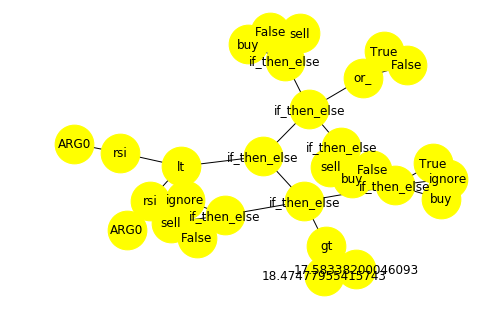

In [2]:
performance_dfs = e.analyze_all_datasets()

In [ ]:
performance_dfs[0]

In [ ]:
performance_dfs[1]

Experiment id: run_evolution.data_OMG-BTC-1522540800.0-1527811200.0-DOGE-BTC-1522540800.0-1527811200.0;grammar_gv1;fitness_ff_benchmarkdiff;matingprob_0.9;mutationprob_0.5;populationsize_50;generations_3

String representation:
if_then_else(lt(rsi(ARG0), rsi(ARG0)), if_then_else(gt(18.47477955415743, 17.58338200046093), if_then_else(True, buy, ignore), if_then_else(False, ignore, sell)), if_then_else(or_(False, True), if_then_else(False, sell, buy), if_then_else(False, sell, buy)))



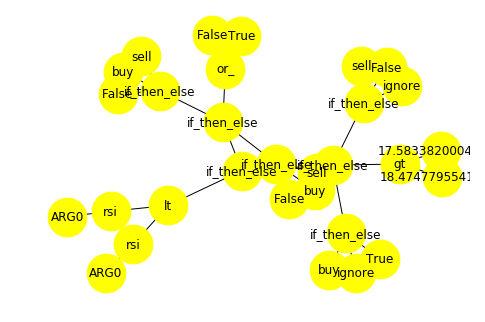

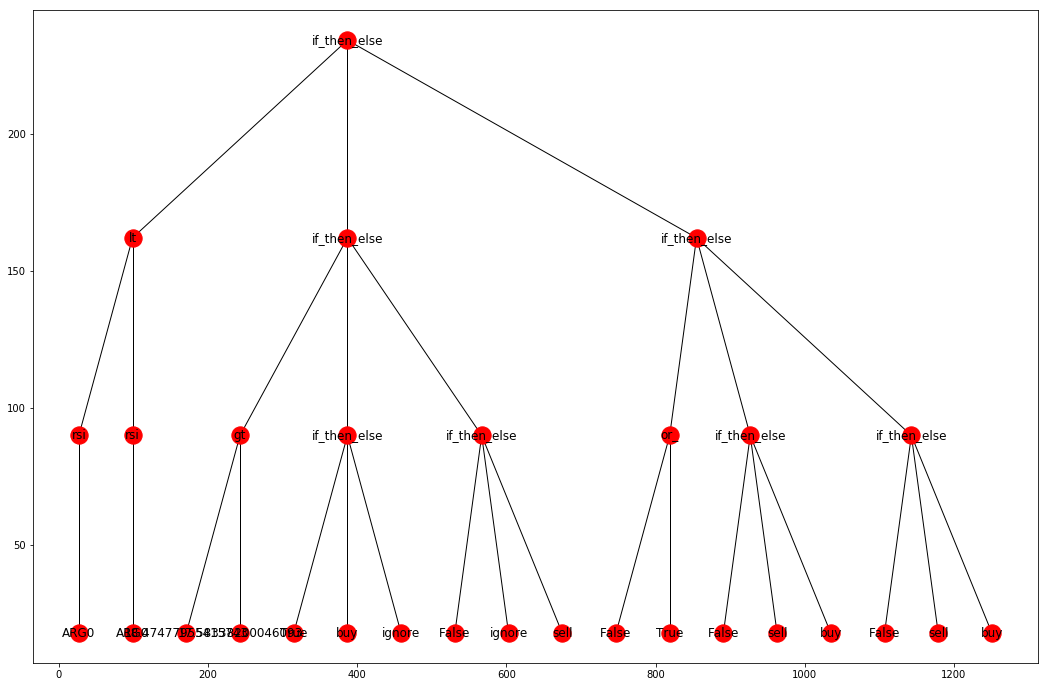

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-03 03:00:00  	 OrderType.BUY    	 cash_balance ->      -1000.00 BTC 	 currency_balance -> 809652.519054 OMG 	 (1 OMG = 0.00123201 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-03 03:00:00 rsi_value=None
End time: 2018-06-01 00:00:00

Summary
--
Number of trades: 1
End cash: 0.00 BTC
End crypto: 809652.519054 OMG
End price: 0.00141478
Total value invested: 1000 BTC
Total value after investment: 1142.62 BTC (+14.26%)
Profit: 142.62 BTC
Total value invested: 6920000.00 USDT (conversion on 2018-04-01 00:00:00)
Total value after investment: 8567071.15 USDT (+23.80%) (conversion on 2018-06-01 00:00:00)
Profit: 1647071.15 USDT

Additional stats:
  Max drawdown: -0.4012452438602555
  Max drawdown duration: 2847060.0
  Sharpe ratio: 0.21902348605249883
  Alpha: 0.0004499821026953988
  Beta: 0.9998787641329256


In [3]:
best = e.performance_df_row_info(performance_dfs[0].iloc[0])

In [ ]:
doge = DogeDNACanvas(best,"container")
HTML(doge.create_container())

In [ ]:
Javascript(doge.show())

### Random thoughts
* perhaps a great doge baby would be found in more generations
* when the market is bearish, some top performing strategies produce no trades (bug or feature?)
* in bullish markets, we see babies that sell and then buy again immediately - unrealistic
* keep reseeding initial population until some individual with good fitness is found 
* alternative: seed initial population with good individuals (e.g. RSI strategy, etc.) 
* compress babies by evaluating expressions within them (for instance 'if False')
* overfitting should be solved by evaluating babies over different time periods / currencies?
